In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataframe
tel=pd.read_csv("C://Users//Yashus G//Desktop//EPGPDS//Programming Related//Machine Learning//Case Study_Telecom_Churn//telecom_churn_data.csv")

In [3]:
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
tel.shape

(99999, 226)

#### The raw data has 99999 rows and 226 columns/features

In [5]:
tel[tel["mobile_number"].duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


#### All mobile numbers have an unique entry

### Determining High value customers

In [6]:
recharge=[x for x in tel.columns if "rech" in x]

In [7]:
recharge

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [8]:
pd.set_option("display.max_columns",200)

tel[recharge].head(10)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
5,2,2,3,3,120,0,130,130,120,0,130,130,6/19/2014,7/17/2014,8/24/2014,9/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15,10,11,7,499,222,294,141,90,37,50,30,6/28/2014,7/31/2014,8/28/2014,9/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN,NaN,2.0,3.0,NaN,NaN,0.0,0.0,NaN,NaN,177.0,69.0,NaN
9,4,2,5,3,220,195,210,180,110,154,50,130,6/29/2014,7/23/2014,8/29/2014,9/20/2014,NaN,7/23/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,154.0,NaN,NaN


#### The columns `total_rech_amt_6`, `total_rech_amt_7`,`total_rech_amt_8`,`total_rech_amt_9` contain the total recharge that is done in the respective month which is inclusive of both recharge done for data and normal calling. This is derived based on observation of a few rows. For example, in the first row, the recharge done for data in 6th month is 252, while the `total_rech_amt_6`=362. Thus it can be interpreted that this column is the sum of amounts of all recharges done in the 6th month
#### However, this is not very clear from the data dictionary

In [9]:
tel['avg_rech']=np.average([tel.total_rech_amt_6.fillna(0),tel.total_rech_amt_7.fillna(0)],axis=0)

In [10]:
rech_70=np.percentile(tel.avg_rech,70)
rech_70

368.5

#### Extracting the high value customers based on 70th percentile of average recharge over first 2 months

In [11]:
df=tel[tel['avg_rech']>rech_70]

In [12]:
df.shape

(29979, 227)

In [13]:
#There is a reduction from 99,999 rows to approx. 30,000 rows. This contains only high-value customers.

#### Handling columns with missing values

In [14]:
x=(df.isna().sum()/len(df)*100).sort_values(ascending=False) #determinig Percentage of missing values in each column

In [15]:
y=x[x>=40] #getting list all columns having percentage of missing values greater than or equal to 40%

In [16]:
y.index #Dropping these columns

Index(['arpu_3g_6', 'count_rech_3g_6', 'fb_user_6', 'arpu_2g_6',
       'night_pck_user_6', 'date_of_last_rech_data_6', 'total_rech_data_6',
       'max_rech_data_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'fb_user_9',
       'night_pck_user_9', 'date_of_last_rech_data_9', 'total_rech_data_9',
       'max_rech_data_9', 'count_rech_2g_9', 'arpu_2g_9', 'count_rech_3g_9',
       'arpu_3g_9', 'av_rech_amt_data_9', 'count_rech_3g_7', 'arpu_2g_7',
       'date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7',
       'av_rech_amt_data_7', 'max_rech_data_7', 'arpu_3g_7',
       'night_pck_user_7', 'count_rech_2g_7', 'av_rech_amt_data_8',
       'night_pck_user_8', 'date_of_last_rech_data_8', 'arpu_2g_8',
       'max_rech_data_8', 'count_rech_2g_8', 'arpu_3g_8', 'total_rech_data_8',
       'fb_user_8', 'count_rech_3g_8'],
      dtype='object')

In [17]:
df.drop(y.index,axis=1, inplace=True)

C:\Users\Yashus G\AppData\Local\Temp\ipykernel_23644\3167814541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(y.index,axis=1, inplace=True)


In [18]:
df.shape

(29979, 187)

#### After dropping we are left with 188 columns

In [19]:
temp=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
temp[temp>0]

std_og_mou_9            5.680643
std_og_t2m_mou_9        5.680643
loc_og_t2c_mou_9        5.680643
loc_og_t2m_mou_9        5.680643
std_ic_t2m_mou_9        5.680643
                          ...   
std_og_t2o_mou          0.380266
date_of_last_rech_7     0.380266
loc_ic_t2o_mou          0.380266
date_of_last_rech_6     0.206811
last_date_of_month_7    0.103406
Length: 126, dtype: float64

In [20]:
#Identifying columns with only one value throughout
temp=[]
for i in df.columns:
    count=df[i].value_counts()
    if len(count)==1:
        temp.append(i)
temp

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

#### These columns can be dropped as they add no additional information in model building

In [21]:
df.drop(temp,axis=1, inplace=True)
df.shape

C:\Users\Yashus G\AppData\Local\Temp\ipykernel_23644\2737549869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(temp,axis=1, inplace=True)


(29979, 171)

In [22]:
temp=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
temp[temp>4]

std_og_t2f_mou_9    5.680643
roam_ic_mou_9       5.680643
loc_og_mou_9        5.680643
loc_ic_t2t_mou_9    5.680643
loc_og_t2f_mou_9    5.680643
std_ic_t2m_mou_9    5.680643
std_ic_mou_9        5.680643
loc_og_t2m_mou_9    5.680643
std_og_t2t_mou_9    5.680643
spl_ic_mou_9        5.680643
loc_og_t2t_mou_9    5.680643
loc_ic_t2m_mou_9    5.680643
std_og_t2m_mou_9    5.680643
roam_og_mou_9       5.680643
og_others_9         5.680643
loc_og_t2c_mou_9    5.680643
std_ic_t2t_mou_9    5.680643
ic_others_9         5.680643
loc_ic_t2f_mou_9    5.680643
offnet_mou_9        5.680643
std_og_mou_9        5.680643
spl_og_mou_9        5.680643
isd_ic_mou_9        5.680643
loc_ic_mou_9        5.680643
isd_og_mou_9        5.680643
onnet_mou_9         5.680643
std_ic_t2f_mou_9    5.680643
dtype: float64

In [23]:
# It can be observed that all these columns with greater than 5% of missing values belong to 9th month
#thus it will be better to handle these afteridentifying the churn and non-churn customers

In [24]:
# calculate the total call usage for month 9 and assign it to a new column
df["total_call_usage_9"] = df['total_ic_mou_9'].fillna(0) + df['total_og_mou_9'].fillna(0)

# calculate the total data usage for month 9 and assign it to a new column
df["total_vol_usage_9"] = df['vol_2g_mb_9'].fillna(0) + df['vol_3g_mb_9'].fillna(0)

C:\Users\Yashus G\AppData\Local\Temp\ipykernel_23644\1705906685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_call_usage_9"] = df['total_ic_mou_9'].fillna(0) + df['total_og_mou_9'].fillna(0)
C:\Users\Yashus G\AppData\Local\Temp\ipykernel_23644\1705906685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_vol_usage_9"] = df['vol_2g_mb_9'].fillna(0) + df['vol_3g_mb_9'].fillna(0)


In [25]:
df['churn']=''
df['churn'] = df.apply(lambda row: 1 if row['total_call_usage_9'] == 0 and row['total_vol_usage_9'] == 0 else 0, axis=1)

C:\Users\Yashus G\AppData\Local\Temp\ipykernel_23644\3946228183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn']=''
C:\Users\Yashus G\AppData\Local\Temp\ipykernel_23644\3946228183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df.apply(lambda row: 1 if row['total_call_usage_9'] == 0 and row['total_vol_usage_9'] == 0 else 0, axis=1)


In [26]:
df.churn.value_counts(normalize=True)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

#### From the above output it can be seen that only 8.6% of the high-value customers are churning.
#### This dataset has a class imbalance as very less number of customers are actually churning.

#### Removing attributes from the churn phase(9th Month)

In [27]:
churn_phase_attr=[]
for i in df.columns:
    if "9" in i:
        churn_phase_attr.append(i)
churn_phase_attr

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_call_usage_9',
 'total_vol_usage_9']

In [28]:
len(churn_phase_attr)

43

In [29]:
# Dropping these attributes as per requirement of the case study

In [30]:
df2=df.drop(churn_phase_attr, axis=1)

In [31]:
df.shape

(29979, 174)

In [32]:
df2.shape

(29979, 131)

#### We therefore have 131 attributes in the final dataset to work with

In [33]:
# Obtaining columns with date

In [34]:
col_date=[]
for i in df2.columns:
    if "date" in i:
        col_date.append(i)
col_date

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [35]:
# Dropping these columns as ML models for classification cannot process this type of data

In [36]:
df2.drop(col_date, axis=1, inplace=True)

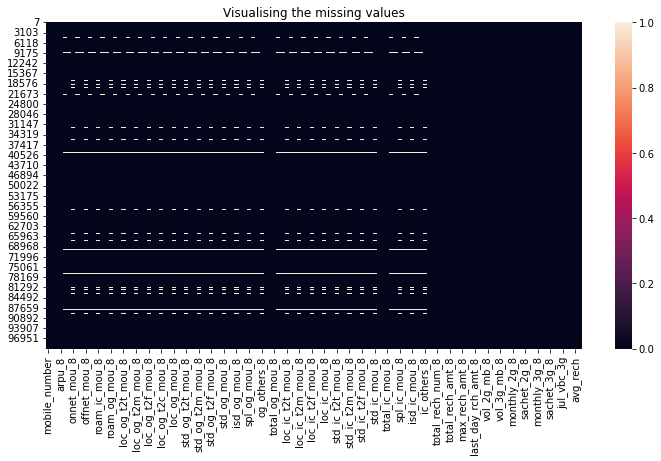

In [37]:
plt.figure(figsize=(12,6))
plt.title("Visualising the missing values")
sns.heatmap(df2.isnull())
plt.show()

In [38]:
x=(df2.isna().sum()/len(df2)*100).sort_values(ascending=False)

In [39]:
x[x>3]

std_og_t2f_mou_8    3.128857
loc_og_mou_8        3.128857
loc_og_t2c_mou_8    3.128857
loc_ic_t2m_mou_8    3.128857
og_others_8         3.128857
loc_og_t2f_mou_8    3.128857
loc_ic_t2f_mou_8    3.128857
loc_ic_mou_8        3.128857
loc_og_t2m_mou_8    3.128857
std_og_mou_8        3.128857
std_ic_t2t_mou_8    3.128857
loc_og_t2t_mou_8    3.128857
std_og_t2t_mou_8    3.128857
std_ic_t2m_mou_8    3.128857
roam_og_mou_8       3.128857
std_ic_t2f_mou_8    3.128857
roam_ic_mou_8       3.128857
spl_og_mou_8        3.128857
std_ic_mou_8        3.128857
offnet_mou_8        3.128857
std_og_t2m_mou_8    3.128857
spl_ic_mou_8        3.128857
onnet_mou_8         3.128857
isd_og_mou_8        3.128857
isd_ic_mou_8        3.128857
ic_others_8         3.128857
loc_ic_t2t_mou_8    3.128857
dtype: float64

In [40]:
df2[x.index].churn.value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [41]:
x.index

Index(['std_og_t2f_mou_8', 'loc_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_ic_t2m_mou_8', 'og_others_8', 'loc_og_t2f_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8',
       ...
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'churn'],
      dtype='object', length=128)

In [42]:
df2[(df2['std_og_t2f_mou_8'].isna() & df2['loc_og_mou_8'].isna() & df2['loc_og_t2c_mou_8'].isna())]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech,churn
111,7001300706,596.301,146.073,0.00,55.19,3.26,NaN,45.51,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.0,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.30,0.00,NaN,1.30,0.00,NaN,0.00,0.0,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.0,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.0,NaN,1.13,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.0,0.00,0.0,NaN,0.00,0.0,NaN,0.15,0.0,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.00,0.00,0.00,0.0,441.0,1
143,7000106299,695.609,39.981,0.00,1325.91,28.61,NaN,13.91,1.89,NaN,0.00,8.94,NaN,0.00,8.53,NaN,18.89,6.83,NaN,8.58,1.56,NaN,0.00,0.00,NaN,2.09,0.0,NaN,27.48,8.39,NaN,1307.01,13.58,NaN,1.95,0.00,NaN,0.00,0.00,NaN,1308.96,13.58,NaN,0.00,0.0,NaN,3.38,0.00,NaN,1.20,0.0,NaN,1341.03,21.98,0.0,30.19,7.06,NaN,27.98,1.35,NaN,10.13,0.00,NaN,68.31,8.41,NaN,25.56,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,25.56,0.00,NaN,93.88,8.41,0.0,0.00,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,31,6,4,796,40,0,90,30,0,10,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0,1
188,7000340381,734.641,183.668,0.00,4.38,0.98,NaN,105.16,39.39,NaN,0.00,0.00,NaN,0.00,0.00,NaN,4.38,0.98,NaN,99.81,38.98,NaN,5.34,0.41,NaN,0.00,0.0,NaN,109.54,40.38,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.00,NaN,0.00,0.0,NaN,109.54,40.38,0.0,21.18,13.44,NaN,217.03,56.63,NaN,18.28,2.94,NaN,256.49,73.03,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.00,0.00,NaN,256.49,73.03,0.0,0.00,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,6,1,0,864,120,0,252,120,0,252,120,0,58.44,0.00,0.0,1522.40,0.00,0.0,0,0,0,0,0,0,2,0,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0,1
358,7002255278,688.670,205.780,707.91,68.34,38.93,NaN,550.18,209.68,NaN,19.39,0.00,NaN,61.93,0.00,NaN,35.88,17.31,NaN,98.11,159.08,NaN,58.99,9.66,NaN,0.00,0.0,NaN,192.99,186.06,NaN,32.46,21.61,NaN,318.89,40.93,NaN,11.58,0.00,NaN,362.94,62.54,NaN,0.00,0.0,NaN,0.65,0.00,NaN,0.00,0.0,NaN,556.59,248.61,0.0,15.61,5.58,NaN,28.86,15.49,NaN,24.63,0.00,NaN,69.11,21.08,NaN,3.36,13.36,NaN,87.84,0.0,NaN,0.00,0.0,NaN,91.21,13.36,NaN,171.09,36.34,0.0,0.00

#### From the above output it can be seen that the missing values corresponding to the 8th month are of people who have not used the services. Thus these values with greater than 3% of mmising values can be filled with 0.

In [43]:
indx=df2[(df2['std_og_t2f_mou_8'].isna() & df2['loc_og_mou_8'].isna() & df2['loc_og_t2c_mou_8'].isna())].index

In [44]:
for i in x.index:
    df2[i].fillna(value=0,inplace=True)

In [45]:
((df2.isna().sum()/len(df2)*100)).sort_values(ascending=False)

mobile_number       0.0
arpu_6              0.0
total_rech_amt_6    0.0
total_rech_num_8    0.0
total_rech_num_7    0.0
                   ... 
std_og_t2f_mou_6    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_6    0.0
churn               0.0
Length: 128, dtype: float64

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 128 entries, mobile_number to churn
dtypes: float64(101), int64(27)
memory usage: 29.5 MB


In [47]:
# Since all columns are either of type float or int, we can continue with EDA and then with model building

#Since the rows with missing values occurs in multiple columns
#and from the heatmap it can be seen that the missing values are across the row.
#Thus, these rows can be dropped

df3=df2.dropna()

(df3.isna().sum()).sort_values(ascending=False)

In [48]:
df2.shape

(29979, 128)

In [49]:
df2.churn.value_counts(normalize=True)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

df3.churn.value_counts(normalize=True)*100

### Exploratory Data Analysis

In [50]:
df2.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.0

In [51]:
df2_pivot = pd.pivot_table(df2, values=['arpu_6', 'arpu_7', 'arpu_8'], index='churn', aggfunc=np.mean)

<AxesSubplot:xlabel='churn'>

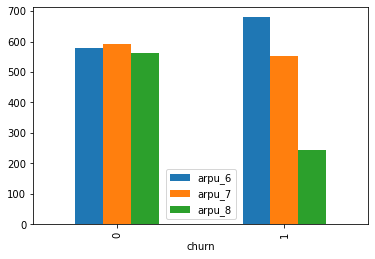

In [52]:
df2_pivot.plot.bar()

#### from the above plot it can be seen that there is significant drop in the arpu that is generated for churn customers in the 8th month

<AxesSubplot:xlabel='churn'>

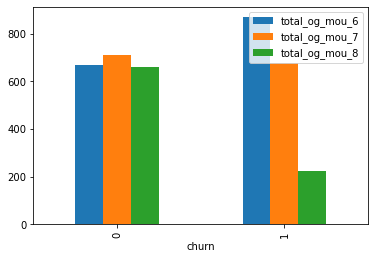

In [53]:
df2_pivot = pd.pivot_table(df2, values=['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], index='churn', aggfunc=np.mean)
df2_pivot.plot.bar()

<AxesSubplot:xlabel='churn'>

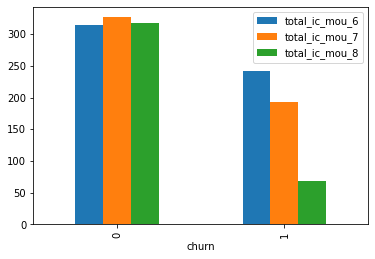

In [54]:
df2_pivot = pd.pivot_table(df2, values=['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'], index='churn', aggfunc=np.mean)
df2_pivot.plot.bar()

### On an average, the `ic_mou` is lower for both churn and non-churn customers as compared to `og_mou`
### Also both `ic_mou` and`og_mou` decrese significantly for churn customers in 8th month

C:\Users\Yashus G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aon'>

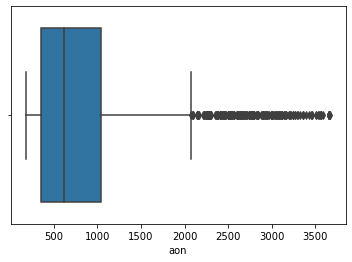

In [55]:
sns.boxplot(df2[df2['churn']==1]['aon'])


#### It can be seen that most number of churn customers ahve a aon of less than 2000 days

C:\Users\Yashus G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aon'>

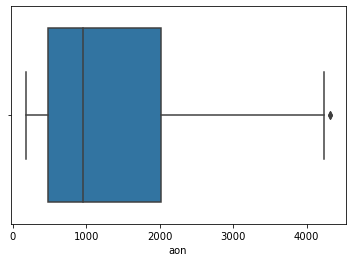

In [56]:
sns.boxplot(df2[df2['churn']==0]['aon'])

C:\Users\Yashus G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aon'>

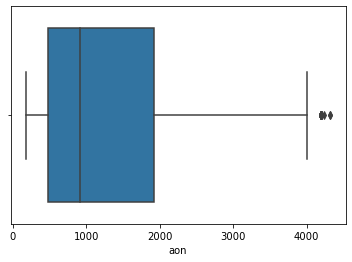

In [57]:
sns.boxplot(df2['aon'])

#### It can be seen that there are a few outliers in AON, but they can be genuine data points and do not need any handling

<AxesSubplot:xlabel='churn'>

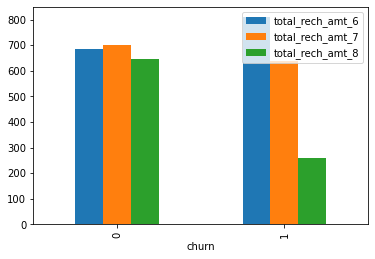

In [58]:
df2_pivot = pd.pivot_table(df2, values=['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'], index='churn', aggfunc=np.mean)
df2_pivot.plot.bar()

#### The recharge amount for churners seems to be higher in the 6th month and this may have motivated them in churning may be due to other options with a lesser cost

### Feature Engineering

#### From the above bar plots, it can be seen that there is a reduction in usage of services from 6,7 and 8th month incase of churners
##### To capture this new features can be added, which looks at month on month change in ic_mou, og_mou and total_rech_amt

In [59]:
df2['change_og_mou_7_6']=(df2['total_og_mou_7']-df2['total_og_mou_6'])
df2['change_og_mou_8_7']=(df2['total_og_mou_8']-df2['total_og_mou_7'])

In [60]:
df2['change_ic_mou_7_6']=(df2['total_ic_mou_7']-df2['total_ic_mou_6'])
df2['change_ic_mou_8_7']=(df2['total_ic_mou_8']-df2['total_ic_mou_7'])

In [61]:
df2['change_tot_rech_7_6']=(df2['total_rech_amt_7']-df2['total_rech_amt_6'])
df2['change_tot_rech_8_7']=(df2['total_rech_amt_8']-df2['total_rech_amt_7'])

In [62]:
df2[['change_og_mou_7_6','change_og_mou_8_7','change_ic_mou_7_6','change_ic_mou_8_7','change_tot_rech_7_6','change_tot_rech_8_7']].describe()

,change_og_mou_7_6,change_og_mou_8_7,change_ic_mou_7_6,change_ic_mou_8_7,change_tot_rech_7_6,change_tot_rech_8_7
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,22.463070,-85.424304,7.330115,-19.481332,-1.411121,-82.40068
std,566.388938,492.130392,238.693517,223.932945,508.260127,455.54538
min,-8058.890000,-5938.460000,-6633.180000,-4173.250000,-12000.000000,-14984.00000
25%,-152.045000,-206.325000,-59.285000,-74.370000,-206.000000,-260.00000
50%,0.000000,-32.350000,2.310000,-8.580000,0.000000,-56.00000
75%,168.875000,83.200000,71.380000,43.930000,201.000000,111.00000
max,8157.510000,11494.350000,5248.780000,4783.250000,16954.000000,13479.00000


In [63]:
#Dropping Values used for calculating the derived features

In [64]:
df2.drop(['total_og_mou_6','total_og_mou_7','total_ic_mou_6','total_rech_amt_6','total_rech_amt_7'],
         axis=1,inplace=True)

### Modelling

In [65]:
#Copying dataframe as deep copy
df3=df2.copy()
df3.pop('mobile_number')

7        7000701601
8        7001524846
13       7002191713
16       7000875565
17       7000187447
            ...    
99970    7001386760
99974    7001453306
99986    7001729035
99988    7002111859
99997    7000498689
Name: mobile_number, Length: 29979, dtype: int64

In [66]:
df3.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech,churn,change_og_mou_7_6,change_og_mou_8_7,change_ic_mou_7_6,change_ic_mou_8_7,change_tot_rech_7_6,change_tot_rech_8_7
count,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,535.067748,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,94.733562,95.787420,87.184563,181.336751,181.323574,167.616746,6.979198,7.100147,6.496088,1.567723,1.86379,1.714052,283.058317,284.220111,261.305826,189.892036,200.060865,172.355233,203.211564,213.516733,179.665270,2.012068,2.035893,1.790935,395.120001,415.617820,353.81534,2.266842,2.207826,2.029675,5.920726,7.429822,6.889372,0.6932

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
df3.churn.value_counts(normalize=True)*100

0    91.363955
1     8.636045
Name: churn, dtype: float64

In [69]:
y=df3['churn']
df3.pop('churn')
X=df3
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify= y)

In [70]:
y_train.value_counts(normalize=True)

0    0.913653
1    0.086347
Name: churn, dtype: float64

In [71]:
y_test.value_counts(normalize=True)

0    0.913609
1    0.086391
Name: churn, dtype: float64

In [72]:
#Using logistic regression to identify feature importance
import statsmodels.api as sm

In [73]:
logm1=sm.GLM(y_train,sm.add_constant(X_train), family=sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20859
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3742.1
Date:                Tue, 14 Mar 2023   Deviance:                       7484.2
Time:                        21:11:01   Pearson chi2:                 3.85e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2065
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2063      0.117     -1.769      0.077      -0.435       0.022
arpu_6                  0.0005      0.000      1.984      0.047    5.73e-06       0.001
arpu_7                  0.0005      0.000      1.869      0.062   -2.47e-05       0.001
arpu_8                  0.0003      0.000      0.824      0.410      -0.000       0.001
onnet_mou_6             0.0009      0.007      0.134      0.894      -0.013       0.015
onnet_mou_7            -0.0007      0.004     -0.160      0.873      -0.009       0.007
onnet_mou_8             0.0004      0.004      0.121      0.904      -0.007       0.007
offnet_mou_6            0.0003      0.007      0.040      0.968      -0.013       0.014
offnet_mou_7            0.0007      0.004      0.169      0.866      -0.007       0.008
offnet_mou_8           -0.0018      0.004     -0.503      0.615      -0.009       0.005
roam_ic_mou_6           0.0009      0.000      2.127      0.033    7.26e-05       0.002
roam_ic_mou_7          -0.0002      0.000     -0.438      0.661      -0.001       0.001
roam_ic_mou_8          -0.0002      0.000     -0.489      0.625      -0.001       0.001
roam_og_mou_6          -0.0002      0.007     -0.032      0.974      -0.014       0.013
roam_og_mou_7           0.0003      0.004      0.080      0.936      -0.008       0.008
roam_og_mou_8           0.0010      0.004      0.286      0.775      -0.006       0.008
loc_og_t2t_mou_6       -0.1947      5.637     -0.035      0.972     -11.243      10.853
loc_og_t2t_mou_7        5.2515      5.671      0.926      0.354      -5.864      16.366
loc_og_t2t_mou_8       26.3461      6.525      4.038      0.000      13.558      39.134
loc_og_t2m_mou_6       -0.1943      5.637     -0.034      0.972     -11.242      10.854
loc_og_t2m_mou_7        5.2503      5.671      0.926      0.355      -5.865      16.365
loc_og_t2m_mou_8       26.3483      6.525      4.038      0.000      13.560      39.136
loc_og_t2f_mou_6       -0.1997      5.637     -0.035      0.972     -11.248      10.849
loc_og_t2f_mou_7        5.2536      5.671      0.926      0.354      -5.862      16.369
loc_og_t2f_mou_8       26.3485      6.525      4.038      0.000      13.560      39.137
loc_og_t2c_mou_6       -0.0048      0.005     -0.929      0.353      -0.015       0.005
loc_og_t2c_mou_7       -0.0014      0.005     -0.296      0.767      -0.011       0.008
loc_og_t2c_mou_8        0.0025      0.006      0.394      0.693      -0.010       0.015
loc_og_mou_6           -6.8673      6.882     -0.998      0.318     -20.356       6.621
loc_og_mou_7           -0.8483      7.325     -0.116      0.908     -15.205      13.508
loc_og_mou_8           -5.0633      8.439     -0.600      0.549     -21.604      11.477
std_og_t2t_mou_6        4.8674      6.600      0.738      0.461      -8.068      17.802
std

In [74]:
# using random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

feats = X_train.columns
feature_imp=[]
for feature in zip(feats, rf.feature_importances_):
    print(feature)
    feature_imp.append(feature)
    

('arpu_6', 0.009143092146227029)
('arpu_7', 0.010720113964388414)
('arpu_8', 0.02292081641808867)
('onnet_mou_6', 0.007743406092241811)
('onnet_mou_7', 0.007329569979413226)
('onnet_mou_8', 0.020984689098503213)
('offnet_mou_6', 0.008394108073006088)
('offnet_mou_7', 0.008717536180533284)
('offnet_mou_8', 0.029162641338144134)
('roam_ic_mou_6', 0.0033919597458656574)
('roam_ic_mou_7', 0.007860320431059395)
('roam_ic_mou_8', 0.017599631682356346)
('roam_og_mou_6', 0.0038791826700641384)
('roam_og_mou_7', 0.008021731672094615)
('roam_og_mou_8', 0.016159576721050346)
('loc_og_t2t_mou_6', 0.006592736022485845)
('loc_og_t2t_mou_7', 0.007043532426231167)
('loc_og_t2t_mou_8', 0.012941226719583433)
('loc_og_t2m_mou_6', 0.007877451680792654)
('loc_og_t2m_mou_7', 0.005769762452777565)
('loc_og_t2m_mou_8', 0.020036900829721913)
('loc_og_t2f_mou_6', 0.003831927311332113)
('loc_og_t2f_mou_7', 0.004795427921751961)
('loc_og_t2f_mou_8', 0.002505472585194005)
('loc_og_t2c_mou_6', 0.0030155687691247467

In [75]:
feature_imp = sorted(feature_imp, key=lambda x: x[1], reverse=True)

In [76]:
feature_imp

[('total_og_mou_8', 0.054106544821881146),
 ('loc_ic_mou_8', 0.04567720414596518),
 ('total_ic_mou_8', 0.04219642498688393),
 ('loc_ic_t2m_mou_8', 0.03795642028254842),
 ('loc_og_mou_8', 0.03237010600986078),
 ('offnet_mou_8', 0.029162641338144134),
 ('loc_ic_t2t_mou_8', 0.028212362072730746),
 ('arpu_8', 0.02292081641808867),
 ('total_rech_amt_8', 0.021910683506123994),
 ('onnet_mou_8', 0.020984689098503213),
 ('change_og_mou_8_7', 0.020591641419494017),
 ('loc_og_t2m_mou_8', 0.020036900829721913),
 ('roam_ic_mou_8', 0.017599631682356346),
 ('last_day_rch_amt_8', 0.016237451175031965),
 ('roam_og_mou_8', 0.016159576721050346),
 ('change_tot_rech_8_7', 0.015993125213672882),
 ('loc_og_t2t_mou_8', 0.012941226719583433),
 ('change_ic_mou_8_7', 0.012772355820393674),
 ('std_ic_mou_8', 0.012293236313987082),
 ('arpu_7', 0.010720113964388414),
 ('aon', 0.010246893574081824),
 ('change_og_mou_7_6', 0.00914641266287338),
 ('arpu_6', 0.009143092146227029),
 ('max_rech_amt_8', 0.009123306902448

### From both the above outputs it can be seen that features in 8th month seem to be have higher value of coefficients. Implying that actions of customers contribute more towards explaining the churn customers

In [77]:
#checking for accuracy, recall and precision scores to evaluate base models
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [78]:
y_train_pred=logm1.predict(sm.add_constant(X_train))
y_test_pred=logm1.predict(sm.add_constant(X_test))

In [79]:
y_train_pred=y_train_pred.apply(lambda x: 1 if x>0.5 else 0)
y_test_pred=y_test_pred.apply(lambda x: 1 if x>0.5 else 0) #taking 0.5 as random cutoff

In [80]:
def evaluate(y_real, y_pred):
    print("Accuracy score:", accuracy_score(y_real,y_pred))
    print("Precision score: {}".format(precision_score(y_real, y_pred)))
    print("Recall score: {}".format(recall_score(y_real, y_pred)))
    print("F1 score: {}".format(f1_score(y_real, y_pred)))

In [81]:
#Training scores
evaluate(y_train, y_train_pred)

Accuracy score: 0.9367643554920181
Precision score: 0.7032690695725062
Recall score: 0.4630242825607064
F1 score: 0.5584026622296172


In [82]:
#Test-set scores

In [83]:
evaluate(y_test, y_test_pred)

Accuracy score: 0.9357349344007115
Precision score: 0.687382297551789
Recall score: 0.4697554697554698
F1 score: 0.5581039755351682


In [84]:
from sklearn.metrics import roc_curve, auc

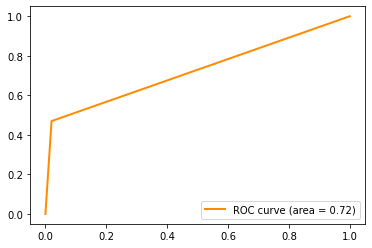

In [85]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()







In [86]:
#There is minimal drop in accuracy, but since this is an imbalanced dataset, the accuracy score cannot be relied upon
# THe recall value is low at 0.46 which is lower than 0.5(a random guesser)
# Thus there is room for model improvement

In [87]:
#### Using PCA for Dimensionality reduction

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
X_train_scl=scaler.fit_transform(X_train)
X_test_scl=scaler.transform(X_test)

In [91]:
pca=PCA(random_state=50)

In [92]:
pca.fit(X_train_scl)

PCA(random_state=50)

In [93]:
pca.components_

array([[ 1.06430644e-01,  1.19881212e-01,  1.40393934e-01, ...,
        -9.35416535e-03,  1.54300402e-02,  2.92189618e-02],
       [ 1.29603304e-01,  1.76646175e-01,  1.76219928e-01, ...,
         9.91896226e-03,  5.01605428e-02,  5.79574618e-03],
       [ 1.24395807e-01,  1.53966893e-01,  1.52557892e-01, ...,
         2.10825806e-02,  3.05561217e-02,  1.44744174e-03],
       ...,
       [-1.98105429e-07,  1.04326066e-07,  1.55992765e-07, ...,
        -5.97932153e-03, -1.10857429e-07,  6.54636410e-08],
       [-4.03219212e-16, -7.70436853e-17, -1.28642919e-16, ...,
        -2.41333388e-01, -2.34611077e-01, -4.12679045e-01],
       [-0.00000000e+00, -9.16262655e-17,  2.37541124e-16, ...,
         3.21172784e-01, -1.76289800e-01, -3.10092376e-01]])

In [94]:
pca.explained_variance_ratio_

array([9.15111423e-02, 7.52626607e-02, 5.34061887e-02, 4.51829678e-02,
       3.80220034e-02, 3.60438839e-02, 3.01800599e-02, 2.77857243e-02,
       2.72129040e-02, 2.57495708e-02, 2.44929535e-02, 2.39222830e-02,
       2.28346931e-02, 2.13139388e-02, 2.12811041e-02, 2.01846649e-02,
       1.91089219e-02, 1.65764582e-02, 1.53354230e-02, 1.46489133e-02,
       1.39641896e-02, 1.31643009e-02, 1.28449192e-02, 1.25841066e-02,
       1.12157983e-02, 1.09679106e-02, 1.06762943e-02, 1.01855025e-02,
       9.99523090e-03, 9.53442983e-03, 9.06184147e-03, 8.95666217e-03,
       8.25956245e-03, 7.71458099e-03, 7.59232988e-03, 7.24085124e-03,
       6.91301062e-03, 6.53180637e-03, 6.41508764e-03, 6.19114728e-03,
       6.07312973e-03, 5.90641432e-03, 5.77483629e-03, 5.72193219e-03,
       5.18577703e-03, 5.09583264e-03, 4.85268014e-03, 4.74053775e-03,
       4.53400644e-03, 4.46217766e-03, 4.14850977e-03, 4.10194657e-03,
       3.98206874e-03, 3.87616810e-03, 3.66338289e-03, 3.56101094e-03,
      

Making a scree plot for the explained variance

In [95]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

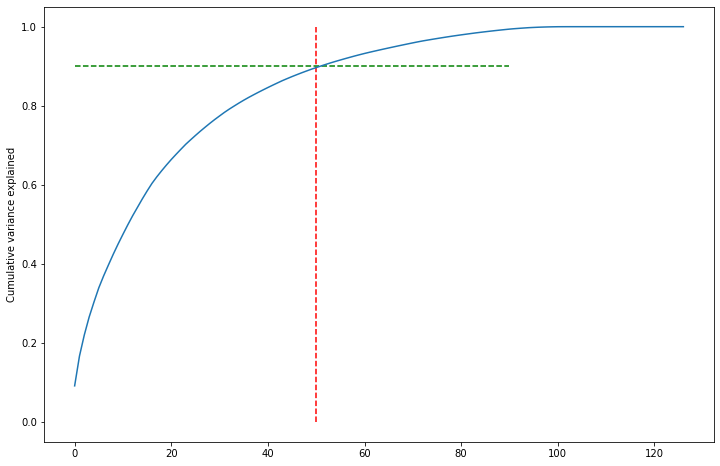

In [96]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=90,xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [97]:
#Thus for the PCA to be able to explain 90% of the variance, we will need to use 50 PCA components

In [98]:
pca2=PCA(n_components=50)

In [99]:
pca2.fit(X_train_scl)

PCA(n_components=50)

In [100]:
df_train_pca=pca2.transform(X_train_scl)
df_test_pca=pca2.transform(X_test_scl)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log_pca=LogisticRegression()

In [103]:
pca_log_mod=log_pca.fit(df_train_pca,y_train)

In [104]:
pred_probs_train=pca_log_mod.predict_proba(df_train_pca)
pred_probs_test = pca_log_mod.predict_proba(df_test_pca)

In [105]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [106]:
pred_probs_train

array([[0.65705828, 0.34294172],
       [0.97137262, 0.02862738],
       [0.56976725, 0.43023275],
       ...,
       [0.96851379, 0.03148621],
       [0.94927258, 0.05072742],
       [0.9950046 , 0.0049954 ]])

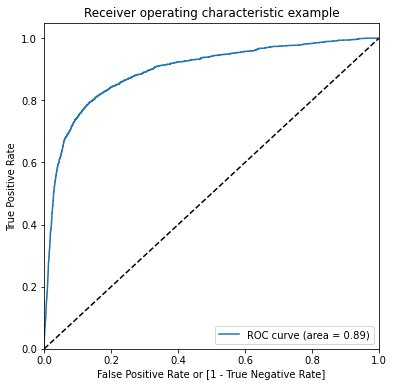

(array([0.        , 0.        , 0.        , ..., 0.99989569, 0.99994784,
        1.        ]),
 array([0.00000000e+00, 5.51876380e-04, 1.10375276e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99978543e+00, 9.99785426e-01, 9.99483678e-01, ...,
        2.21291423e-16, 5.98680122e-17, 2.03191789e-19]))

In [107]:
draw_roc(y_train,pred_probs_train[:,1])

In [108]:
pred_probs_train

array([[0.65705828, 0.34294172],
       [0.97137262, 0.02862738],
       [0.56976725, 0.43023275],
       ...,
       [0.96851379, 0.03148621],
       [0.94927258, 0.05072742],
       [0.9950046 , 0.0049954 ]])

In [109]:
pred_train=[1 if pred_probs_train[i,1]>0.2 else 0 for i in range(len(pred_probs_train))]
pred_test=[1 if pred_probs_test[i,1]>0.2 else 0 for i in range(len(pred_probs_test))]

In [110]:
evaluate(y_train,pred_train)

Accuracy score: 0.9030736240171551
Precision score: 0.46004319654427644
Recall score: 0.7052980132450332
F1 score: 0.5568627450980392


In [111]:
evaluate(y_test,pred_test)

Accuracy score: 0.9054925505892818
Precision score: 0.4677846425419241
Recall score: 0.6821106821106822
F1 score: 0.5549738219895287


In [112]:
# from the above it can be seen that after PCA the values of recall has improved from 0.46 to 0.68 after using PCA.
# The performance may further be improved by handling class imbalance

### Handling class imbalance

In [113]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train_scl, y_train)
len(X_resampled_us)

3624

In [114]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test_scl)

C:\Users\Yashus G\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
#print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.8132088058705804
F1 score:  0.429735234215886
Recall:  0.8146718146718147
Precision:  0.2918395573997234

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8217
           1       0.29      0.81      0.43       777

    accuracy                           0.81      8994
   macro avg       0.64      0.81      0.66      8994
weighted avg       0.92      0.81      0.85      8994



In [116]:
### it can be seen that recall has increased after undersampling

In [117]:
# Using SMOTE- Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train_scl, y_train)
len(X_resampled_smt)

38346

In [118]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test_scl)

C:\Users\Yashus G\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
#print ('\n confsmtsion matrix:\n',confsmtion_matrix(y_test, y_pred_smt))

Accuracy:  0.8284411830108962
F1 score:  0.44635809113742375
Recall:  0.8005148005148005
Precision:  0.309452736318408

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8217
           1       0.31      0.80      0.45       777

    accuracy                           0.83      8994
   macro avg       0.64      0.82      0.67      8994
weighted avg       0.92      0.83      0.86      8994



In [120]:
# There is a marginal drop in recall as compared to random undersampling in SMOTE

In [121]:
# Inspite of that all other evaluation metrics have increased

In [122]:
# Using random forests on this scaled, oversampeled PCA dataset to see if recall can be further increased

In [123]:
rand_frst=RandomForestClassifier(random_state=25)

In [124]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5],
    'min_samples_leaf': [20, 50, 100],
    'max_features': [10,25,50,100],
    'n_estimators': [10,20, 30]
}

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rand_frst, param_grid=params, 
                                 cv=4, n_jobs=-1, verbose=1, scoring = 'recall')

In [127]:
%%time
grid_search.fit(X_resampled_smt,y_resampled_smt)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
CPU times: total: 6.25 s
Wall time: 2min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=25), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5],
                         'max_features': [10, 25, 50, 100],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [10, 20, 30]},
             scoring='recall', verbose=1)

In [128]:
rf_best = grid_search.best_estimator_

In [129]:
rf_best

RandomForestClassifier(max_depth=5, max_features=50, min_samples_leaf=20,
                       n_estimators=20, random_state=25)

In [130]:
final_rf=RandomForestClassifier(max_depth=5, max_features=50, min_samples_leaf=20,
                       n_estimators=10, random_state=25)

In [131]:
rf=final_rf.fit(X_resampled_smt, y_resampled_smt)
y_pred_rf=final_rf.predict(X_test_scl)

In [132]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
#print ('\n confsmtsion matrix:\n',confsmtion_matrix(y_test, y_pred_rf))

Accuracy:  0.8828107627307094
F1 score:  0.5417391304347826
Recall:  0.8018018018018018
Precision:  0.4090610636900854

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8217
           1       0.41      0.80      0.54       777

    accuracy                           0.88      8994
   macro avg       0.69      0.85      0.74      8994
weighted avg       0.93      0.88      0.90      8994



In [133]:
# It can be seen that there is an increase in Recall

In [134]:
# Using Adaboost

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
#Using adaBoosting to predict 'Churn' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=85)
#Fitting Model
adaboost.fit(X_resampled_smt, y_resampled_smt)

AdaBoostClassifier(n_estimators=200, random_state=85)

In [137]:
#pred
y_pred_ada = adaboost.predict(X_test_scl)

In [138]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
#print ('\n confsmtsion matrix:\n',confsmtion_matrix(y_test, y_pred_ada))

Accuracy:  0.9129419613075384
F1 score:  0.5709589041095892
Recall:  0.6705276705276705
Precision:  0.49713740458015265

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8217
           1       0.50      0.67      0.57       777

    accuracy                           0.91      8994
   macro avg       0.73      0.80      0.76      8994
weighted avg       0.93      0.91      0.92      8994



In [139]:
# There is a decrease in recall using AdaBoostClassifier for 1's

In [140]:
# Using XGBoost Classifier

In [141]:
from xgboost import XGBClassifier

In [142]:
xgb_model = XGBClassifier()

In [143]:
xgb_model.fit(X_resampled_smt, y_resampled_smt)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_scl)

In [144]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb))
print ('F1 score: ', f1_score(y_test, y_pred_xgb))
print ('Recall: ', recall_score(y_test, y_pred_xgb))
print ('Precision: ', precision_score(y_test, y_pred_xgb))
print ('\n clasification report:\n', classification_report(y_test,y_pred_xgb))
#print ('\n confsmtsion matrix:\n',confsmtion_matrix(y_test, y_pred_xgb))

Accuracy:  0.9342895263509006
F1 score:  0.6062624916722186
Recall:  0.5855855855855856
Precision:  0.6284530386740331

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      8217
           1       0.63      0.59      0.61       777

    accuracy                           0.93      8994
   macro avg       0.79      0.78      0.79      8994
weighted avg       0.93      0.93      0.93      8994



In [145]:
#Though the overall recall is high, the recall for 1's is low compared to Logistic regression and Random forest model.

In [146]:
#Thus to determine the feature importance the best fit Random forest will be used

In [147]:
final_rf=RandomForestClassifier(max_depth=5, max_features=50, min_samples_leaf=20,
                                n_estimators=10, random_state=25)

In [148]:
final_rf.fit(X_train_scl, y_train)

RandomForestClassifier(max_depth=5, max_features=50, min_samples_leaf=20,
                       n_estimators=10, random_state=25)

In [149]:
rf=final_rf.fit(X_resampled_smt, y_resampled_smt)
y_pred_rf=rf.predict(X_test_scl)

In [150]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
#print ('\n confsmtsion matrix:\n',confsmtion_matrix(y_test, y_pred_rf))

Accuracy:  0.8828107627307094
F1 score:  0.5417391304347826
Recall:  0.8018018018018018
Precision:  0.4090610636900854

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8217
           1       0.41      0.80      0.54       777

    accuracy                           0.88      8994
   macro avg       0.69      0.85      0.74      8994
weighted avg       0.93      0.88      0.90      8994



In [151]:
y_test.value_counts()

0    8217
1     777
Name: churn, dtype: int64

In [152]:
final_rf.feature_importances_

array([2.37952558e-04, 6.41556920e-04, 1.12032957e-01, 0.00000000e+00,
       0.00000000e+00, 1.27492465e-03, 0.00000000e+00, 3.40629859e-04,
       1.13682161e-03, 2.35229637e-04, 4.27696995e-03, 6.64849374e-02,
       1.27810207e-05, 2.19115459e-03, 1.60552806e-01, 2.54862314e-04,
       8.10313414e-04, 1.99249252e-03, 2.21282040e-04, 0.00000000e+00,
       0.00000000e+00, 2.10911790e-04, 0.00000000e+00, 1.51799442e-04,
       0.00000000e+00, 8.27117863e-05, 0.00000000e+00, 0.00000000e+00,
       2.68507307e-04, 9.42172897e-03, 8.11376336e-04, 5.23612831e-04,
       6.53523609e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.79022457e-04,
       1.64341946e-03, 2.72437009e-04, 0.00000000e+00, 5.74871446e-04,
       0.00000000e+00, 0.00000000e+00, 3.40364662e-03, 6.00199976e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.99374869e-03,
       0.00000000e+00, 8.10525628e-05, 9.35317012e-04, 0.00000000e+00,
      

In [153]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": final_rf.feature_importances_
})

In [154]:
imp_df[(imp_df['Imp']>0.008)].sort_values(by="Imp",ascending=False)

,Varname,Imp
77,total_ic_mou_8,0.184907
14,roam_og_mou_8,0.160553
63,loc_ic_mou_8,0.129119
90,total_rech_amt_8,0.128650
2,arpu_8,0.112033
11,roam_ic_mou_8,0.066485
57,loc_ic_t2m_mou_8,0.063629
96,last_day_rch_amt_8,0.043714
122,change_og_mou_8_7,0.015761
124,change_ic_mou_8_7,0.013242


## Thus the top 15 features in decreasing order of their importance is as above.

In [155]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [156]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns,class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

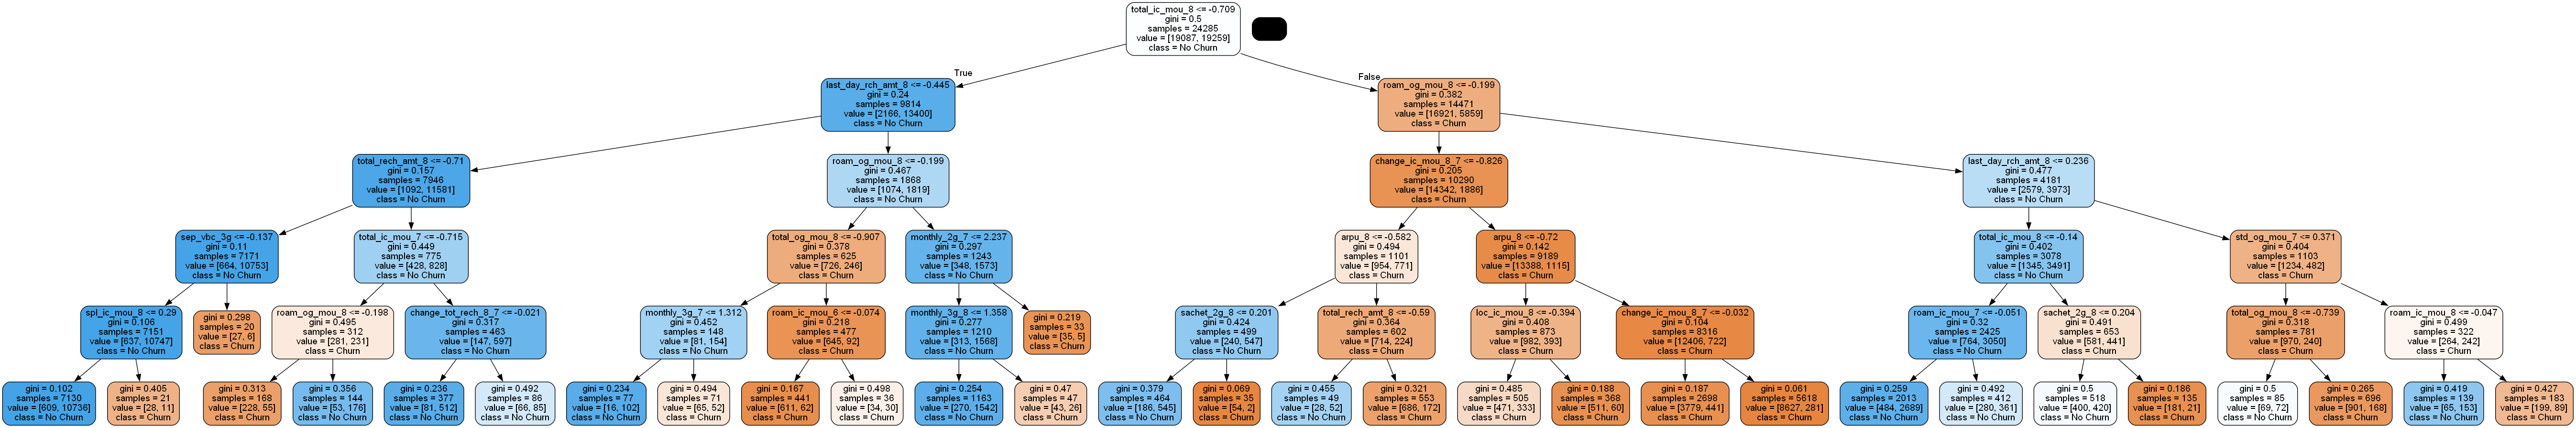

In [157]:
gph = get_dt_graph(final_rf.estimators_[0])
Image(gph.create_png(), height=10000, width=1200)

## The above visualisation depicts how one of the decision trees from among the random forest ensemble splits the data point in arriving at a final decision if the customer may be at risk of churn or not.

The best random forest had the following characteristics:
* max_depth=5, 
* max_features=50,
* min_samples_leaf=20,
* n_estimators=10,
* random_state=25

The best random forest model was found to have the following evaluation metrics:
* Accuracy:  0.8828107627307094
* F1 score:  0.5417391304347826
* Recall:  0.8018018018018018
* Precision:  0.4090610636900854